# 3.2シグモイド関数

## ステップ関数の実装

In [4]:
def step_faunction(x):
    if x > 0:
        return 1
    else :
        return 0
#実数しか入力不可→numpyで取るようにする

In [5]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [6]:
import numpy as np
x = np.array([-1.0,1.0,2.0])

In [7]:
x

array([-1.,  1.,  2.])

In [8]:
y = x  > 0

In [9]:
y

array([False,  True,  True], dtype=bool)

In [10]:
y = y.astype(np.int)

In [11]:
y

array([0, 1, 1])

(-0.1, 1.1)

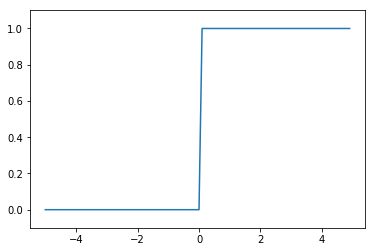

In [12]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

def step_function(x):
    return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)

## シグモイド関数の実装

In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [14]:
x = np.array([-1.0,-2.0,2.0])
sigmoid(x)

array([ 0.26894142,  0.11920292,  0.88079708])

(-0.1, 1.1)

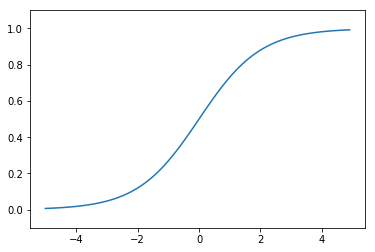

In [15]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)

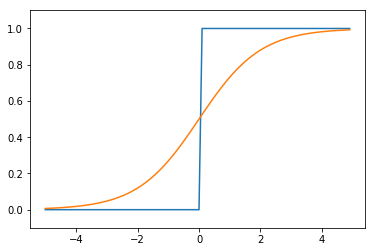

In [16]:
x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
plt.ylim(-0.1,1.1)
plt.plot(x,y)
z = sigmoid(x)
plt.plot(x,z)

In [17]:
#ニューラルネットワークでは連続的な実数値の信号を流すことが可能

In [18]:
## ReLU関数

In [19]:
def relu(x):
    return np.maximum(0,x)

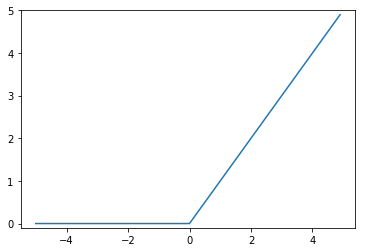

In [20]:
x = np.arange(-5.0,5.0,0.1)
y = relu(x)
plt.ylim(-0.1,5.0,0.1)
plt.plot(x,y)

In [21]:
## 3.3.3　ニューラルネットワークの行列の積

In [22]:
X = np.array([1,2])
X.shape

(2,)

In [23]:
W = np.array([[1,3,5],[2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [24]:
W.shape

(2, 3)

In [25]:
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


## 3.43層ニューラルネットワークの実装

In [26]:
X =np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])
print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [27]:
A1 = np.dot(X,W1) + B1
print(A1.shape)
print(A1)

(3,)
[ 0.3  0.7  1.1]


In [28]:
Z1 = sigmoid(A1)
print(Z1)

[ 0.57444252  0.66818777  0.75026011]


In [29]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])
print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [30]:
A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)

In [31]:
def identity_function(x):
    return x

In [32]:
W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])
A3 = np.dot(Z2,W3) + B3
Y = identity_function(A3)

In [33]:
print(Y)

[ 0.31682708  0.69627909]


In [34]:
#実装のまとめ
def init_network():
    
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    
    return network

def forward(network, x):
    W1,W2,W3 = network['W1'], network['W2'], network['W3']
    b1,b2,b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x =np.array([1.0,0.5])
y = forward(network, x)

In [35]:
y

array([ 0.31682708,  0.69627909])

## 3.5 出力層の設計

### 3.5.1ソフトマックス関数の実装

In [36]:
a  = np.array([0.3,2.9,4.0])
exp_a = np.exp(a)
print(exp_a)

[  1.34985881  18.17414537  54.59815003]


In [37]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542102


In [38]:
y = exp_a/sum_exp_a
print(y)

[ 0.01821127  0.24519181  0.73659691]


In [39]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    return y

In [40]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) #オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    return y

In [41]:
a = np.array([0.3,2.9,4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[ 0.01821127  0.24519181  0.73659691]
1.0


## 3.6手書き数字認識

In [47]:
import sys,os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test.t_test) = \
 load_mnist(flatten=True,normalize=Faluse)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(x_test.shape)

ModuleNotFoundError: No module named 'dataset'